In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
def Height_prediction ( gender, BA, current_H ) :
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    
    lms_df = pd.read_csv('./boneage/growth//height_df.csv')
    month_age = round(BA * 12)
    if gender == 1:
        lms_index = month_age - 36                                                             
        L_18, M_18, S_18 = lms_df.iloc[191,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
    elif gender == 0:
        lms_index = month_age - 36
        L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

    L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
    x = current_H
    
    Z = (((x/M)**L)-1)/(L*S)
    Z = round(Z,4)

    pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
    pred_height = round(pred_height, 1)
    return pred_height

In [8]:
def find_th(df,BA,Height):
    try:
        df = df.reset_index()
        find_df = df[(df['AGE'] == BA) & (df['MONTH'] == BA*12)] >= Height
        result_df = find_df.any()
        result_th = list(result_df[result_df==True].index)[0]
        return result_th
    except:
        print('Abnormal growth. Please check again')

In [9]:
def Height_graph(gender, Predict_BA, current_Height):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,15))

    ## 성별에 따른 DF 변환

    if gender == 1:
        df = pd.read_csv('./boneage/growth/male_year.csv',index_col='AGE')
        sns.lineplot(data=df[['3rd','5th','10th','25th','50th','75th','90th','95th','97th']],palette='PuBu',dashes=False)
    elif gender == 0:
        df = pd.read_csv('./boneage/growth/female_year.csv',index_col='AGE')
        sns.lineplot(data=df[['3rd','5th','10th','25th','50th','75th','90th','95th','97th']],palette='Reds',dashes=False)
    
    ## 위치하고 있는 분위수 판단
    result_th = find_th(df,Predict_BA,current_Height)

    ## 18세 예상 키 예측
    Predict_Height = Height_prediction(gender,Predict_BA,current_Height)

    ## x,y 축 라벨링
    plt.xlabel('Age')
    plt.ylabel('Height')

    # 현재 나이 (예측 골연령값) + 현재 신장
    plt.axvline(Predict_BA,color='k',linestyle='--')
    plt.axhline(current_Height,color='k',linestyle='--')

    ## 분위수 오류해결

    if result_th == 'MONTH':
        plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15)
    elif result_th == None :
        plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15)
    elif result_th != None:
        plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , {result_th} ]'), alpha=1, color='k',fontsize=15)

    ## 18세 나이 + 예측 신장
    plt.axvline(18,color='r',linestyle='--')
    plt.axhline(Predict_Height,color='r',linestyle='--')


    ## 성별별 Annotation
    if gender ==1 :
        plt.text(x=13, y=Predict_Height+5, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)
    elif gender == 0 :
        plt.text(x=13, y=175, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)


    ## 라인 주석처리
    if gender == 1 :
        plt.text(x=19,y=185.3,s='97th',alpha=1,color='#276b93',fontsize=10) #97
        plt.text(x=19,y=183.9,s='95th',alpha=1,color='#438cb9',fontsize=10) #95
        plt.text(x=19,y=181.8,s='90th',alpha=1,color='#519cc8',fontsize=10) #90
        plt.text(x=19,y=178.3,s='75th',alpha=1,color='#71afd1',fontsize=10) #75
        plt.text(x=19,y=174.5,s='50th',alpha=1,color='#95beda',fontsize=10) #50
        plt.text(x=19,y=170.8,s='25th',alpha=1,color='#b4cae2',fontsize=10) #25
        plt.text(x=19,y=167.5,s='10th',alpha=1,color='#cfd6e9',fontsize=10) #10
        plt.text(x=19,y=165.6,s='5th',alpha=1,color='#e3e3ef',fontsize=10) #5
        plt.text(x=19,y=164.4,s='3rd',alpha=1,color='#f3eff6',fontsize=10) #3

    if gender == 0 :
        plt.text(x=19,y=170.8,s='97th',alpha=1,color='#b1484d',fontsize=10) #97
        plt.text(x=19,y=169.5,s='95th',alpha=1,color='#cc4e53',fontsize=10) #95
        plt.text(x=19,y=167.6,s='90th',alpha=1,color='#c84a4e',fontsize=10) #90
        plt.text(x=19,y=164.4,s='75th',alpha=1,color='#f47265',fontsize=10) #75
        plt.text(x=19,y=161.1,s='50th',alpha=1,color='#fb8e77',fontsize=10) #50
        plt.text(x=19,y=157.8,s='25th',alpha=1,color='#fca78f',fontsize=10) #25
        plt.text(x=19,y=154.9,s='10th',alpha=1,color='#fcbfaa',fontsize=10) #10
        plt.text(x=19,y=153.2,s='5th',alpha=1,color='#fddbcd',fontsize=10) #5
        plt.text(x=19,y=152.2,s='3rd',alpha=1,color='#feebe1',fontsize=10) #3      


    ## 범례 위치 적용
    plt.legend(loc='upper left')
    plt.grid(linestyle='--',color='k',linewidth=0.5,)
    plt.xticks(ticks=range(3,19))
    plt.yticks(ticks=range(80,201,10))
    plt.title('3-18 Age & Height')
    
    return result_th, Predict_Height

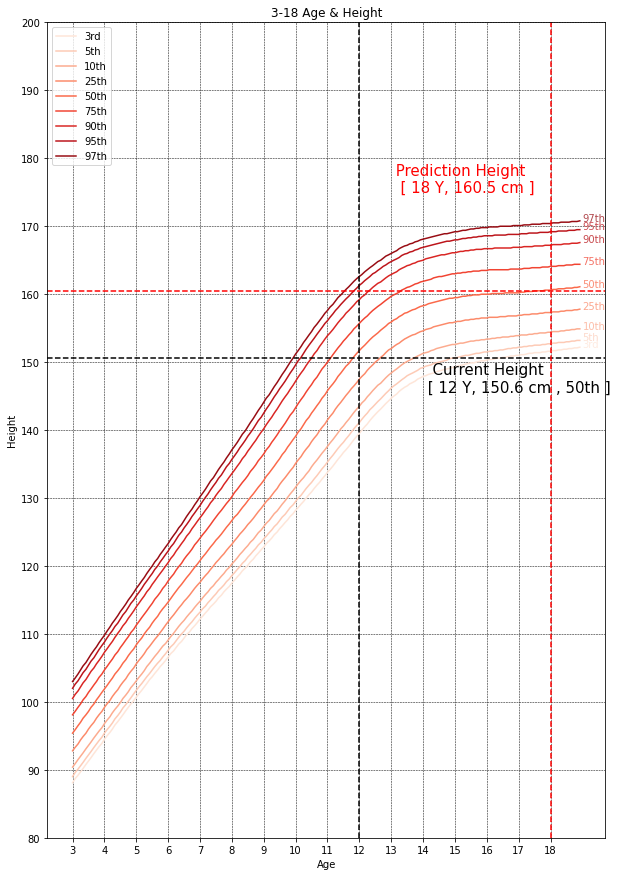

In [10]:
# def Height_graph(gender, Predict_BA, current_Height):
Height_graph(0,12,150.6)

In [11]:
# # 모듈 import
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
# import glob
# import math
# import re
# import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')

# #-----------------------------------------------------------------------------------
# # read_img(path) -> original_img
# # make_mask(original_img) -> mask
# # cut_mask(original_img, mask) -> masked
# # img_rotation(masked) ->rotated_img

# # ---- morphology_value_1, morphology_value_2, filter_value(a,b)
# # Decomposing(rotated_img,a,b,d,e) -> bone_extraction 
# #-----------------------------------------------------------------------------------

# # 이미지 경로에서 불러오기.
# def read_img(path):
#     original_img = cv2.imread(path)
#     return original_img


# # 원본 이미지를 넣어서 마스크 만드는 함수.
# ########## Making mask for removing background #############
# def make_mask(original_img):
#     ## change to lab for making mask
#     img_mask = original_img.copy()
#     img_mask = cv2.cvtColor(img_mask, cv2.COLOR_RGB2BGR)
#     img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2Lab)
    
#     ## blur _02 
#     # kernel_size = odds / value = img.mean()


#     blur_k = int((img_mask.mean()*0.5)//2)*2+1
#     img_mask = cv2.medianBlur(img_mask, blur_k)
    
#     ## change to Grayscale for threshold

#     img_mask = cv2.cvtColor(img_mask, cv2.COLOR_Lab2BGR)
#     img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)

#     ## binary / value = img.mean()

#     if img_mask.mean() > 100 : 
#       th = img_mask.mean()*0.94
#     else : 
#       th = img_mask.mean()

#     ret, img_mask = cv2.threshold(img_mask, th, 255, cv2.THRESH_BINARY)

#     ## mask based Max value of contours

#     contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     max_cnt = max(contours, key=cv2.contourArea)
#     mask = np.zeros(img_mask.shape, dtype=np.uint8)
#     cv2.drawContours(mask, [max_cnt], -1, (255,255,255), -1)
    
#     ## Applying for dilation

#     k = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
#     mask = cv2.dilate(mask,k)
#     return mask


# # 마스크를 이용하여 원본이미지의 배경을 자르는 함수.
# ######## background cut based mask ##########
# def cut_mask(original_img, mask):

#     ## copying
#     img_for_cut = original_img.copy()

#     ## H/W
#     height, width = img_for_cut.shape[:2]

#     ## mask
#     mask_list = mask.tolist()
    
#     for y in range(int(height*0.05),height):
#         if max(mask[y,int(width*0.3):int(width*0.7)]) > 0:
#             start_y = y-int(height*0.05)
#             break
            
#     for x in range(int(width*0.05),width):
#         if max(mask[int(height*0.3):int(height*0.7),x]) > 0:
#             start_x = x-int(width*0.05)
#             break
            
#     for x in range(int(width*0.95),-1,-1):
#         if max(mask[int(height*0.3):int(height*0.7),x]) > 0:
#             end_x = x+int(width*0.05)
#             break
            
#     cut_index = 0
#     if mask_list[height-1][-1] == 255 or mask_list[height-1][0] == 255:
#         for n in reversed(range(height)):
#             if mask_list[n][0] == 0 or mask_list[n][-1] == 0:
#                 cut_index = n
#                 break
                
#     if cut_index == 0:
#         cut_index = height

#     ## converting color
#     img_for_cut = cv2.cvtColor(img_for_cut, cv2.COLOR_BGR2GRAY) 

#     img_for_cut = img_for_cut[start_y:(cut_index-1),start_x:end_x]
#     mask = mask[start_y:(cut_index-1),start_x:end_x]

#     ## remove background
#     masked = cv2.bitwise_and(img_for_cut, mask)

#     return masked


# # 마스크씌어진 이미지를 회전시키는 함수.
# ######## Rotation ########
# def img_rotation(masked):
#     ## copying img
#     before_rot_img = masked.copy()

    
#     h, w = before_rot_img.shape[:2]
#     before_rot_img = cv2.cvtColor(before_rot_img, cv2.COLOR_RGB2BGR)
#     gray = cv2.cvtColor(before_rot_img, cv2.COLOR_BGR2GRAY)
#     ret, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
#     th_li = th.tolist()

#     ## Rotation stage 01
#     # lower = first black spot

#     for i in reversed(range(h)):
#         if th_li[i][0] == 0 and th_li[i][-1] == 0:
#             lower = i
#             break

#     # lower = condition ; bottom = lower / img * 0.95

#     if lower == h - 1:
#         lower = int(h*0.9)

#     # upper = condition ; lower + lower * 0.05

#     slice5 = int(len(th)*0.05)
#     upper = lower - slice5

#     # x, y = between upper and lower (5%) / wrist center

#     x,y = [],[]
#     for i in range(slice5):
#         cnt = th_li[i + upper].count(255)
#         index = th_li[i + upper].index(255)
#         x.append([i+upper])
#         y.append([int((index*2 + cnt - 1)/2)])

#     # x, y / draw regression line

#     model = LinearRegression()
#     model.fit(X=x,y=y)

#     ####################################################

#     ## Rotation stage 02
#     angle = math.atan2(h - 0, int(model.predict([[h]])) - int(model.predict([[0]])))*180/math.pi
#     M = cv2.getRotationMatrix2D((w/2,h/2), angle-90, 1)
#     rotate = cv2.warpAffine(before_rot_img, M, (w, h))

#     # Cutting img (rotated img)

#     for i in range(len(th[-1])):
#         if th[-1][i] == 255:
#             start_x = i
#             break

#     for i in range(len(th[-1])):
#         if th[-1][i] == 255:
#             end_x = i
            

#     s_point = h - int((int(model.predict([[h]])-start_x)) * math.tan(math.pi*((90-angle)/180)))
#     e_point = h - int((end_x - int(model.predict([[h]]))) * math.tan(math.pi*((angle-90)/180)))
#     point = max(s_point, e_point)
#     rotated_img = rotate[:point]
#     return rotated_img



# # 이미지 발기조절, 대비, 필터링 작업으로 뼈 추출하는 함수
# ### img, morphology_value_1, morphology_value_2, filter_value(a,b)
# def Decomposing(rotated_img,a,b,d,e):

#     ######## Decomposing_stage_1 / [ Contours , Mask ] ########
#     decomp_img_1 = rotated_img.copy()

#     ## Adjusting brighness
#     d_img1 = decomp_img_1.copy()
#     cols, rows = d_img1.shape[:2]
#     brightness1 = np.sum(d_img1) / (255 * cols * rows)

#     if brightness1 > 0.8:
#         decomp_img_1 = np.clip(decomp_img_1 - 80., 0, 255).astype(np.uint8)
#     elif brightness1 > 0.75:
#         decomp_img_1 = np.clip(decomp_img_1 - 50., 0, 255).astype(np.uint8)
#     elif brightness1 > 0.65:
#         decomp_img_1 = np.clip(decomp_img_1 - 30., 0, 255).astype(np.uint8)
#     else: decomp_img_1 = np.clip(decomp_img_1 - 10., 0, 255).astype(np.uint8)


#     ## change to Lab
#     decomp_img_1 = cv2.cvtColor(decomp_img_1, cv2.COLOR_RGB2BGR)
#     decomp_img_1 = cv2.cvtColor(decomp_img_1, cv2.COLOR_BGR2Lab)

#     ## Morphology
#     k = cv2.getStructuringElement(cv2.MORPH_CROSS, (a, a))
#     decomp_img_1 = cv2.morphologyEx(decomp_img_1, cv2.MORPH_TOPHAT, k) # Emphasis

#     ## Filter
#     decomp_img_1 = cv2.bilateralFilter(decomp_img_1,-1, d, e)

#     ## Lab to gray for binary
#     decomp_img_1 = cv2.cvtColor(decomp_img_1, cv2.COLOR_Lab2BGR)
#     decomp_img_1 = cv2.cvtColor(decomp_img_1, cv2.COLOR_BGR2GRAY)

#     ## img_normalization
#     decomp_img_1 = cv2.normalize(decomp_img_1, None, 0, 255, cv2.NORM_MINMAX)

#     ## CLAHE
#     decomp_img_1 = cv2.equalizeHist(decomp_img_1)
#     clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3)) 
#     decomp_img_1= clahe.apply(decomp_img_1)          


#     ## Threshold / value = img.mean()
#     ret, mask = cv2.threshold(decomp_img_1,
#                             np.mean(decomp_img_1),
#                             255,
#                             cv2.THRESH_BINARY) 

#     ## Extract object / same value pixels

#     contours, hierarchy = cv2.findContours(mask, 
#                                             cv2.RETR_EXTERNAL, # only outline
#                                             cv2.CHAIN_APPROX_SIMPLE) # Contour vertex coordinate

#     ## drawing Contours
#     cv2.drawContours(mask, contours, -1, (255,255,255), -1) # -1: 모든 컨트어 표시 /color/ fill


        
#     ######## Decomposing_stage_2 / [ Brightness_Empahsis ] ########
#     decomp_img_2 = rotated_img.copy()

#     ## Brightness_Empahsis
#     d_img2 = decomp_img_2.copy()
#     cols, rows = d_img2.shape[:2]
#     brightness2 = np.sum(d_img2) / (255 * cols * rows)

#     ## Empahsis
#     if brightness2 > 0.8:
#         decomp_img_2 = np.clip(decomp_img_2 - 80., 0, 255).astype(np.uint8)
#     elif brightness2 > 0.75:
#         decomp_img_2 = np.clip(decomp_img_2 - 50., 0, 255).astype(np.uint8)
#     elif brightness2 > 0.65:
#         decomp_img_2 = np.clip(decomp_img_2 - 30., 0, 255).astype(np.uint8)
#     else: decomp_img_2 = np.clip(decomp_img_2 - 10., 0, 255).astype(np.uint8)


#     ## Morphology
#     k2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(b,b))
#     decomp_img_2 = cv2.morphologyEx(decomp_img_2, cv2.MORPH_TOPHAT, k2)

#     ## contrast
#     decomp_img_2 = cv2.cvtColor(decomp_img_2, cv2.COLOR_BGR2RGB)
#     decomp_img_2 = cv2.cvtColor(decomp_img_2, cv2.COLOR_BGR2GRAY)

#     if decomp_img_2.mean() <= 15:
#         low = decomp_img_2.mean() * 3.2
#         high = decomp_img_2.mean() * 3.6
#     elif decomp_img_2.mean() <= 20:
#         low = decomp_img_2.mean() * 3
#         high = decomp_img_2.mean() * 3.6
#     else:
#         low = decomp_img_2.mean() * 3
#         high = decomp_img_2.mean() * 3.7

#     decomp_img_2 = cv2.blur(decomp_img_2,(2,2))
#     h, w = decomp_img_2.shape
#     img_ = np.zeros(decomp_img_2.shape, dtype=np.uint8)

#     for y in range(h):
#         for x in range(w):
#             temp = int((255 / (high - low)) * (decomp_img_2[y][x] - low))
#             if temp > 255:
#                 img_[y][x] = 255
#             elif temp < 0:
#                 img_[y][x] = 0
#             else:
#                 img_[y][x] = temp

#     decomp_img_2 = img_.copy()


#     ######## Decomposing_Final_stage / [ Result ] ########
#     ### Bone empahsis / bitwise (mask)
#     ## Morphology
#     ## Contours
#     contours, hierarchy = cv2.findContours(decomp_img_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(decomp_img_2, contours, -1, (255, 255, 255), -1)

#     ## Bitwise (mask) / print white parts

#     decomp_img_2 = cv2.bitwise_and(decomp_img_2, mask) 

#     decomp_img_2 = cv2.cvtColor(decomp_img_2, cv2.COLOR_GRAY2BGR)
#     decomp_img_2 = cv2.blur(decomp_img_2,(2,2))

#     bone_extraction = cv2.resize(decomp_img_2, (600, 800))

#     return bone_extraction



# def Bone_extraction(bone, path):
#     try:
#         original_img = bone.read_img(path)
#         mask = bone.make_mask(original_img)
#         masked = bone.cut_mask(original_img, mask)
#         rotated_img = bone.img_rotation(masked)
#         bone = bone.Decomposing(rotated_img,60,55,50,25)
#         global bone_path
#         bone_path = cv2.imwrite(path, bone)
#         return bone_path

#     except:
#         print('ERROR > Please check again' )

# #########################################################
# # -------------------------------------------------------
# # yolo 이용
# # out_crop_img, crop 이미지 출력
# def out_crop_img(crop, gender):
#     gender = np.array(gender).reshape(1,1)

#     for i in range(7):
#         carpal = re.compile('CARPAL.')
#         ip = re.compile('IP.')
#         lmcp = re.compile('LMCP.')
#         lpip = re.compile('LPIP.')
#         mmcp = re.compile('MMCP.')
#         mpip = re.compile('MPIP.')
#         tmcp = re.compile('TMCP.')

#         if carpal.search(crop[i]['label']):
#             CARPAL_img = crop[i]['im']
#             CARPAL_img = cv2.resize(CARPAL_img, (224,224),cv2.INTER_AREA)
#             CARPAL_img = np.expand_dims(CARPAL_img, axis=0)

#         if ip.search(crop[i]['label']):
#             IP_img = crop[i]['im']
#             IP_img = cv2.resize(IP_img, (75,75),cv2.INTER_AREA)
#             IP_img = np.expand_dims(IP_img, axis=0)
            
#         if lmcp.search(crop[i]['label']):
#             LMCP_img = crop[i]['im']
#             LMCP_img = cv2.resize(LMCP_img, (75,75),cv2.INTER_AREA)
#             LMCP_img = np.expand_dims(LMCP_img, axis=0)

#         if lpip.search(crop[i]['label']):
#             LPIP_img = crop[i]['im']
#             LPIP_img = cv2.resize(LPIP_img, (75,75),cv2.INTER_AREA)
#             LPIP_img = np.expand_dims(LPIP_img, axis=0)
        
#         if mmcp.search(crop[i]['label']):
#             MMCP_img = crop[i]['im']
#             MMCP_img = cv2.resize(MMCP_img, (75,75),cv2.INTER_AREA)
#             MMCP_img = np.expand_dims(MMCP_img, axis=0)
            
#         if mpip.search(crop[i]['label']):
#             MPIP_img = crop[i]['im']
#             MPIP_img = cv2.resize(MPIP_img, (75,75),cv2.INTER_AREA)
#             MPIP_img = np.expand_dims(MPIP_img, axis=0)

#         if tmcp.search(crop[i]['label']):
#             TMCP_img = crop[i]['im']
#             TMCP_img = cv2.resize(TMCP_img, (75,75),cv2.INTER_AREA)
#             TMCP_img = np.expand_dims(TMCP_img, axis=0)

#         else : continue
#     X = [CARPAL_img, LMCP_img, MMCP_img,TMCP_img, LPIP_img, MPIP_img, IP_img, gender]

#     return X



# # yolo_crop_img
# def yolo_crop_img(save_path, yolo):
#         result = yolo(save_path)
#         crops = result.crop(save=False)
#         img = np.squeeze(result.render())
#         return crops, img, result

# ##  predict_zscore  ##

# def predict_zscore(X, tjnet):

#     # Function connection line ; yolo_crop_img(4)
#     # global yolo
#     # yolo_crop_img(save_path, yolo)  # yolo, 

#     # X = out_crop_img(crops, gender)
#     y_predict = tjnet.predict(X)
#     pred = y_predict[0][0] 

#     BA_mean = 115.41626213592232                                             
#     BA_std = 48.02950411666953 

#     prediction_BA = (pred * BA_std + BA_mean)/12
#     return prediction_BA


# #######################################################3
# # 이미지 출력 함수
# def bone_age_window(img, gender, predicted_bone_age ):
#     img1 = cv2.resize(img, dsize=(450, 600))
#     img2 = np.full((600, 450, 3), 255, np.uint8)
    
#     cv2.putText(img2,
#         "Gender={}".format(gender),
#         (140,100),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         0.6, (0,0,0))

#     cv2.rectangle(img2, 
#                 (70,120),
#                 (380,230),
#                 (100,100,100),
#                 thickness=1, 
#                 lineType=cv2.LINE_AA) 

#     cv2.putText(img2,
#         "Predicted Bone Age",
#         (100,150),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         0.8, (0,0,0))

#     cv2.putText(img2,
#         "(MAE: 4.6)",
#         (180,215),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         0.6, (0,0,0))


#     cv2.putText(img2,
#         "{}".format(predicted_bone_age),
#         (180,195),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         1.3, (255,0,0))

#     predict_result = np.concatenate((img1,img2), axis=1)
#     # cv2.imshow('bone_age',predict_result)
#     # cv2.waitKey()
#     return predict_result

# #######################################################3
# # 그래프 출력 함수

# # lms_df : height_df.csv
# # lms_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/height_df.csv')

# def Height_prediction ( gender, BA, current_H, lms_df) :
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     import pandas as pd

#     month_age = round(BA * 12)
#     if gender == 1:
#         lms_index = month_age - 36                                                             
#         L_18, M_18, S_18 = lms_df.iloc[191,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
#     elif gender == 0:
#         lms_index = month_age - 36
#         L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

#     L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
#     x = current_H
    
#     Z = (((x/M)**L)-1)/(L*S)
#     Z = round(Z,4)

#     pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
#     pred_height = round(pred_height, 1)
#     return pred_height

# def find_th(df,BA,Height):
#     try:
#         df = df.reset_index()
#         find_df = df[(df['AGE'] >= BA) & (df['MONTH'] >= int(BA*12) )] >= Height
#         find_df = find_df.iloc[0]
#         result_th = find_df[find_df==True].index[0]
#         return result_th
#     except:
#         print('Abnormal growth. Please check again')

# # df_m = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/male_year.csv',index_col='AGE')
# # df_fm = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/female_year.csv',index_col='AGE')
# def Height_graph(gender, Predict_BA, current_Height, df_m, df_fm, lms_df):
#     import pandas as pd
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     plt.figure(figsize=(10,15))
    
#     if gender == 1:
#         df = df_m.copy()
#         sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='PuBu',dashes=False)
#     elif gender == 0:
#         df = df_fm.copy()
#         sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='Reds',dashes=False)
    
#     ## 위치하고 있는 분위수 판단
#     result_th = find_th(df,Predict_BA,current_Height)

#     ## 18세 예상 키 예측
#     Predict_Height = Height_prediction(gender,Predict_BA,current_Height, lms_df)

#     ## x,y 축 라벨링
#     plt.xlabel('Age')
#     plt.ylabel('Height')

#     # 현재 나이 (예측 골연령값) + 현재 신장
#     plt.axvline(Predict_BA,color='k',linestyle='--')
#     plt.axhline(current_Height,color='k',linestyle='--')

#     ## 분위수 오류해결

#     if result_th == 'MONTH':
#         plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15)

#     elif result_th == None :
#         plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15)

#     elif result_th != None :
#         plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , {result_th} ]'), alpha=1, color='k',fontsize=15)

#     ## 18세 나이 + 예측 신장
#     plt.axvline(18,color='r',linestyle='--')
#     plt.axhline(Predict_Height,color='r',linestyle='--')


#     ## 성별별 Annotation
#     if gender ==1 :
#         plt.text(x=13, y=Predict_Height+5, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)
#     elif gender == 0 :
#         plt.text(x=13, y=175, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)

#     ## 라인 주석처리
#     if gender == 1 :
#         plt.text(x=19,y=188.0,s='99th',alpha=1,color='#2e6c92',fontsize=10) #99
#         plt.text(x=19,y=185.3,s='97th',alpha=1,color='#276b93',fontsize=10) #97
#         plt.text(x=19,y=183.9,s='95th',alpha=1,color='#438cb9',fontsize=10) #95
#         plt.text(x=19,y=181.8,s='90th',alpha=1,color='#519cc8',fontsize=10) #90
#         plt.text(x=19,y=178.3,s='75th',alpha=1,color='#71afd1',fontsize=10) #75
#         plt.text(x=19,y=174.5,s='50th',alpha=1,color='#95beda',fontsize=10) #50
#         plt.text(x=19,y=170.8,s='25th',alpha=1,color='#b4cae2',fontsize=10) #25
#         plt.text(x=19,y=167.5,s='10th',alpha=1,color='#cfd6e9',fontsize=10) #10
#         plt.text(x=19,y=165.6,s='5th',alpha=1,color='#e3e3ef',fontsize=10) #5
#         plt.text(x=19,y=164.4,s='3rd',alpha=1,color='#f3eff6',fontsize=10) #3
#         plt.text(x=19,y=162.1,s='1st',alpha=1,color='#f7f3f9',fontsize=10) #1


#     if gender == 0 :
#         plt.text(x=19,y=173.2,s='99th',alpha=1,color='#a5383f',fontsize=10) #99
#         plt.text(x=19,y=170.8,s='97th',alpha=1,color='#b1484d',fontsize=10) #97
#         plt.text(x=19,y=169.5,s='95th',alpha=1,color='#cc4e53',fontsize=10) #95
#         plt.text(x=19,y=167.6,s='90th',alpha=1,color='#c84a4e',fontsize=10) #90
#         plt.text(x=19,y=164.4,s='75th',alpha=1,color='#f47265',fontsize=10) #75
#         plt.text(x=19,y=161.1,s='50th',alpha=1,color='#fb8e77',fontsize=10) #50
#         plt.text(x=19,y=157.8,s='25th',alpha=1,color='#fca78f',fontsize=10) #25
#         plt.text(x=19,y=154.9,s='10th',alpha=1,color='#fcbfaa',fontsize=10) #10
#         plt.text(x=19,y=153.2,s='5th',alpha=1,color='#fddbcd',fontsize=10) #5
#         plt.text(x=19,y=152.2,s='3rd',alpha=1,color='#feebe1',fontsize=10) #3
#         plt.text(x=19,y=150.2,s='1st',alpha=1,color='#fee8df',fontsize=10) #1    
      


#     ## 범례 위치 적용
#     plt.legend(loc='upper left')
#     plt.grid(linestyle='--',color='k',linewidth=0.5,)
#     plt.xticks(ticks=range(3,19))
#     plt.yticks(ticks=range(80,201,10))
#     plt.title('3-18 Age & Height')



#     return result_th, Predict_Height

# # --------------------------------------------
# def print_excel_file(name ,gender ,age ,height ,bone_age ,percentile, pred_height, openpath, graphpath):
    
#     import win32com.client as win32
#     import xlsxwriter
#     import openpyxl
#     from openpyxl import Workbook
#     from openpyxl.styles import Font, Alignment, Border, Side, PatternFill, Color
#     from openpyxl.drawing.image import Image


#     wb = Workbook()      # 워크북을 생성한다.
#     ws = wb.active       # 워크 시트를 얻는다.
    
    
#     # 이미지 삽입
#     xray_img = Image(openpath) 
#     xray_img.height = 350
#     xray_img.width = 280
#     ws.add_image(xray_img,'F6')
    
    
#     graph_img= Image(graphpath)
#     graph_img.height = 395
#     graph_img.width = 280
#     ws.add_image(graph_img,'F23')
    
    
#     # title 
#     ws.merge_cells('A6:D7')  
#     ws['A6'] = 'Information'    
#     ca1 = ws['A6']
#     ca1.font = Font(name='맑은 고딕', size=15, bold=True) # .decode('cp949') << decode 필요하면 '맑은고딕'.~ 형식으로 이거쓰면됨
#     ca1.alignment = Alignment(horizontal='left', vertical='center')  # left right center / center bottom top
    
#     a1 = ws['A7']
#     a2 = ws['B7']
#     a3 = ws['C7']
#     a4 = ws['D7']
#     box = Border(bottom=Side(border_style="thick",color='FF439C91'))
#     a1.border = box
#     a2.border = box
#     a3.border = box
#     a4.border = box
    
#     ws.merge_cells('A9:D9') 
#     ws['A9'] = f'Name : {name}'  

#     info1 = ws['A9']
#     info1.font = Font(name='맑은 고딕', size=11, bold=False)
#     info1.alignment = Alignment(horizontal='left', vertical='center')

#     ws.merge_cells('A11:D11')  
#     ws['A11'] = f'Gender : {gender}'  
#     info1 = ws['A11']
#     info1.font = Font(name='맑은 고딕', size=11, bold=False)
#     info1.alignment = Alignment(horizontal='left', vertical='center')
    
#     ws.merge_cells('A13:D13')  
#     ws['A13'] = f'Age : {age}'  
#     info2 = ws['A13']
#     info2.font = Font(name='맑은 고딕', size=11, bold=False)
#     info2.alignment = Alignment(horizontal='left', vertical='center')

#     ws.merge_cells('A15:D15')  
#     ws['A15'] = f'Height : {height}'  
#     info3 = ws['A15']
#     info3.font = Font(name='맑은 고딕', size=11, bold=False)
#     info3.alignment = Alignment(horizontal='left', vertical='center')

#     #------------------------------------------------------------------------
#     ws.merge_cells('A17:D18')  
#     ws['A17'] = 'Diagnosis Bone Age'    
#     ca2 = ws['A17']
#     ca2.font = Font(name='맑은 고딕', size=15, bold=True)
#     ca2.alignment = Alignment(horizontal='left', vertical='center')

#     b1 = ws['A18']
#     b2 = ws['B18']
#     b3 = ws['C18']
#     b4 = ws['D18']
#     box = Border(bottom=Side(border_style="thick",color='FF9ECDC8'))
#     b1.border = box
#     b2.border = box
#     b3.border = box
#     b4.border = box


#     ws.merge_cells('A20:D20')  
#     ws['A20'] = f'Bone Age : {bone_age}'  
#     info4 = ws['A20']
#     info4.font = Font(name='맑은 고딕', size=11, bold=False)
#     info4.alignment = Alignment(horizontal='left', vertical='center')

#     #--------------------------------------------------------------------------
#     ws.merge_cells('A25:D26')  
#     ws['A25'] = 'Predicted Height Growth'    
#     ca3 = ws['A25']
#     ca3.font = Font(name='맑은 고딕', size=15, bold=True)
#     ca3.alignment = Alignment(horizontal='left', vertical='center')

#     c1 = ws['A26']
#     c2 = ws['B26']
#     c3 = ws['C26']
#     c4 = ws['D26']
#     box = Border(bottom=Side(border_style="thick",color='FF9ECDC8'))
#     c1.border = box
#     c2.border = box
#     c3.border = box
#     c4.border = box


#     ws.merge_cells('A28:D28')  
#     ws['A28'] = f'Current height percentile : {percentile}'  
#     info5 = ws['A28']
#     info5.font = Font(name='맑은 고딕', size=11, bold=False)
#     info5.alignment = Alignment(horizontal='left', vertical='center')

#     ws.merge_cells('A30:D30')  
#     ws['A30'] = f'Predicted Height Growth : {pred_height}'  
#     info6_1 = ws['A30']
#     info6_1.font = Font(name='맑은 고딕', size=11, bold=False)
#     info6_1.alignment = Alignment(horizontal='left', vertical='center')
#     ws.merge_cells('A31:D31')  
#     ws['A31'] = '(based on 18 years old)'  
#     info6_2 = ws['A31']
#     info6_2.font = Font(name='맑은 고딕', size=11, bold=False, color='FF7B7B7B')
#     info6_2.alignment = Alignment(horizontal='left', vertical='center')
    
#     # -----------------------------------------------------------------------
#     # -----------------------------------------------------------------------
#     ws.merge_cells('A3:I3')  
#     ws['A3'] = 'Bone Predictor'    
#     ca0 = ws['A3']
#     ca0.font = Font(name='맑은 고딕', size=8, bold=False, color='FF7B7B7B')
#     ca0.alignment = Alignment(horizontal='left', vertical='center')

#     d1 = ws['A3']
#     d2 = ws['B3']
#     d3 = ws['C3']
#     d4 = ws['D3']
#     d5 = ws['E3']
#     d6 = ws['F3']
#     d7 = ws['G3']
#     d8 = ws['H3']
#     d9 = ws['I3']
#     box = Border(bottom=Side(border_style="thick",color='FF439C91'))
#     d1.border = box
#     box = Border(bottom=Side(border_style="thin",color='FF7B7B7B'))
#     d2.border = box
#     d3.border = box
#     d4.border = box
#     d5.border = box
#     d6.border = box
#     d7.border = box
#     d8.border = box
#     d9.border = box

#     import os
#     wb.save(f'./report_excel/{name}.xlsx') # 엑셀로 저장
#     os.system(f'start excel.exe ./report_excel/{name}.xlsx')